In [62]:
#Increase width of Notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

## GMM on Old Faithful Geyser Data

### Some preparation

In [64]:
#Set Path to CSV file
data_path = 'data/faithful.csv'

#Image path for fun
img = mpimg.imread('data/old_faithful.jpg')

In [65]:
#Load CSV and remove NaN
old_faithful_data = np.genfromtxt(data_path, delimiter=',')[1:,1:]
print(old_faithful_data.shape)

(272, 2)


In [66]:
#Plotting Functions to reuse plots
def plot_old_faithful_data(old_faithful_data):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].scatter(old_faithful_data[:,0], old_faithful_data[:,1])
    ax[0].set_title('Old Faithful Eruptions')
    ax[0].set(xlabel='Eruption time (s)', ylabel='Wait time (s)')
    ax[1].imshow(img)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
def plot_old_faithful_data_gmm(old_faithful_data, gmm):
    x = np.linspace(0., 6.)
    y = np.linspace(0., 130.)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X.shape)

    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                     levels=np.logspace(0, 2, 15))
    CB = plt.colorbar(CS, shrink=0.9, extend='both')
    plt.scatter(old_faithful_data[:, 0], old_faithful_data[:, 1], .8)

### Plot of Old Faithful data set

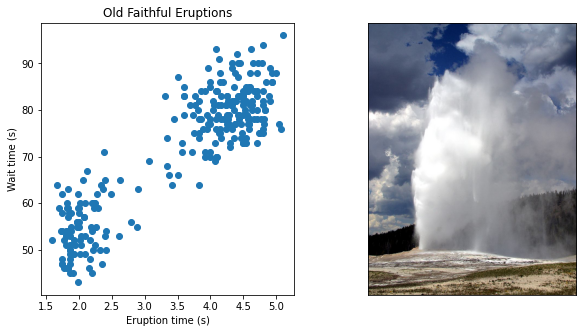

In [67]:
plot_old_faithful_data(old_faithful_data)

### GMM

In [75]:
#Similar arguments as in k-Means (a bit more)
n_components=2
gmm = GaussianMixture(n_components=n_components).fit(old_faithful_data)

In [81]:
#Probabilities for each data point (to which cluster they belong, soft assignment)
gmm.predict_proba(old_faithful_data)

#hard_assignment like k-Means
gmm.predict(old_faithful_data)

array([[2.68469170e-09, 9.99999997e-01],
       [9.99999998e-01, 1.86358243e-09],
       [8.64671381e-06, 9.99991353e-01],
       [9.99989493e-01, 1.05070205e-05],
       [1.08537069e-21, 1.00000000e+00],
       [9.92810346e-01, 7.18965384e-03],
       [1.51744754e-24, 1.00000000e+00],
       [2.72295772e-10, 1.00000000e+00],
       [9.99999998e-01, 2.17015646e-09],
       [3.42657390e-19, 1.00000000e+00],
       [9.99999997e-01, 2.50796991e-09],
       [1.25546044e-13, 1.00000000e+00],
       [4.01048154e-16, 1.00000000e+00],
       [1.00000000e+00, 5.96040321e-11],
       [8.92519472e-24, 1.00000000e+00],
       [9.99999962e-01, 3.76129930e-08],
       [9.99999963e-01, 3.74982002e-08],
       [2.04847270e-25, 1.00000000e+00],
       [1.00000000e+00, 1.59086223e-10],
       [6.29784116e-17, 1.00000000e+00],
       [9.99999999e-01, 5.15045037e-10],
       [1.00000000e+00, 5.96040321e-11],
       [1.33885149e-07, 9.99999866e-01],
       [1.53240150e-02, 9.84675985e-01],
       [5.641774

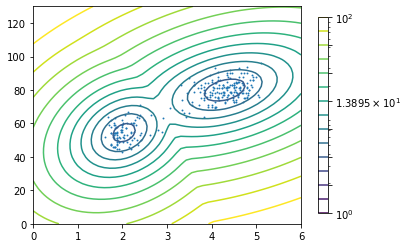

In [69]:
plot_old_faithful_data_gmm(old_faithful_data, gmm)

### How do I find the right number of clusters?
- Similar to k-Means


#### Bayesian Information Criterion

In [91]:
bic=[]
for n_components in range(1,10):
        gmm = GaussianMixture(n_components=n_components).fit(old_faithful_data)
        bic.append(gmm.bic(old_faithful_data))       

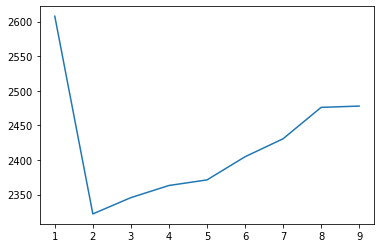

In [92]:
plt.plot(np.arange(1,len(bic)+1),bic)

#### Akaike Information Criterion

In [93]:
aic=[]
for n_components in range(1,10):
        gmm = GaussianMixture(n_components=n_components).fit(old_faithful_data)
        aic.append(gmm.aic(old_faithful_data)) 

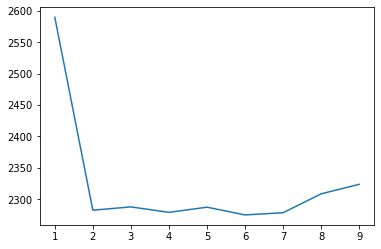

In [94]:
plt.plot(np.arange(1,len(aic)+1),aic)

### Creating a fake Old Faithful?
We can sample from the fitted GMM to generate synthetic data that looks "real"

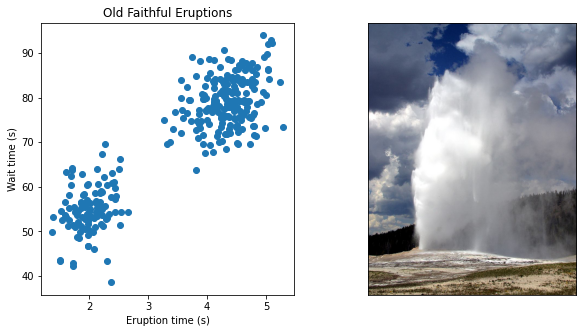

In [112]:
def create_fake_old_faithful(weights, means, covariances, samples=300):
    data_points = []
    for _ in range(samples):
        selected_component = np.random.choice([0,1], size=1, p=weights)
        comp_mean = means[selected_component].squeeze()
        comp_cov = covariances[selected_component].squeeze()
        data_point = np.random.multivariate_normal(comp_mean,comp_cov)
        data_points.append(data_point)
    
    return np.array(data_points)
        

gmm = GaussianMixture(n_components=2).fit(old_faithful_data)
component_weights = gmm.weights_
component_means = gmm.means_
component_covariances = gmm.covariances_

fake_old_faithful_data = create_fake_old_faithful(component_weights, component_means, component_covariances)

plot_old_faithful_data(fake_old_faithful_data)

### One more important thing...

- We used the raw data. Often it is useful to scale the data or perform additional preprocessing on the raw data before using a Cluster algorithm.

- Look at `StandardScaler` or `MinMaxScaler` as a start for your projects


[scikit-learn GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)